## About this document
This is the assignment for the UCL CASA Module Data Science of Spatial Systems. 



### 1. Introduction
The human development index is a widely used measure to understand the development level of a country. understanding the factors that have the most significant impact on it can provide us with valuable insight, into promoting a better quality of life. Grouping countries that share similar development characteristics can aid in better and more informed development aid and intervention. 

### 2. Literature Review

Often countries are marginalized in the transition period of development (Sherwani,2017). There are various factors that are positively and negatively correlated with HDI, in different categories of countries (Mirahmadizadeh, 2022). The index fails to capture the essence of the world (Sagar, A.D. and Najam, 1998)

### 3. Research question



"Which factors have the most significant impact on the Human Development Index (HDI) of a country, and can we group countries into distinct clusters based on these factors to better understand their HDI scores?"

### 4. Presentation of data
(Data collection, handeling, cleaning and Management)

In [50]:
# Importing libraries 

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression  
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA  


In [51]:
import sys
if 'bioinfokit' not in sys.modules:
    !pip3 install bioinfokit
from bioinfokit.visuz import cluster

In [15]:
# Reading xlsx and converting it into csv

# importing pandas module
import pandas as pd

# input excel file path
inputExcelFile ="HDR21-22_Statistical_Annex_HDI_Table.xlsx"

# Reading an excel file
excelFile = pd.read_excel (inputExcelFile)

# Converting excel file into CSV file
excelFile.to_csv ("ResultCsvFile.csv", index = None, header=True)

# Reading and Converting the output csv file into a dataframe object
dataframeObject = pd.DataFrame(pd.read_csv("ResultCsvFile.csv"))

# Displaying the dataframe object first 20 header
dataframeObject.head(20)

dataframeObject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Back         192 non-null    object 
 1   Unnamed: 1   261 non-null    object 
 2   Unnamed: 2   213 non-null    object 
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   214 non-null    object 
 5   Unnamed: 5   1 non-null      object 
 6   Unnamed: 6   214 non-null    object 
 7   Unnamed: 7   101 non-null    object 
 8   Unnamed: 8   214 non-null    object 
 9   Unnamed: 9   87 non-null     object 
 10  Unnamed: 10  214 non-null    object 
 11  Unnamed: 11  11 non-null     object 
 12  Unnamed: 12  212 non-null    object 
 13  Unnamed: 13  1 non-null      object 
 14  Unnamed: 14  212 non-null    object 
dtypes: float64(1), object(14)
memory usage: 32.5+ KB


#### Understanding the data frame

Our dataframe has 9 columns:
1. *Human Development Index (HDI)*: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. See Technical note 1 at http://hdr.undp.org/sites/default/files/hdr2022_technical_notes.pdf for details on how the HDI is calculated.

2. *Life expectancy at birth*: Number of years a newborn infant could expect to live if prevailing patterns of age-specific mortality rates at the time of birth stay the same throughout the infant’s life.

3. *Expected years of schooling*: Number of years of schooling that a child of school entrance age can expect to receive if prevailing patterns of age-specific enrolment rates persist throughout the child’s life.

4. *Mean years of schooling*: Average number of years of education received by people ages 25 and older, converted from education attainment levels using official durations of each level.

5. *Gross national income (GNI) per capita*: Aggregate income of an economy generated by its production and its ownership of factors of production, less the incomes paid for the use of factors of production owned by the rest of the world, converted to international dollars using PPP rates, divided by midyear population.

6. *GNI per capita rank minus HDI rank*: Difference in ranking by GNI per capita and by HDI value. A negative value means that the country is better ranked by GNI than by HDI value.

7. *HDI rank for 2020*: Ranking by HDI value for 2020, calculated using the same most recently revised data available in 2022 that were used to calculate HDI values for 2020.

8. *HDI rank for 2021*: Ranking by HDI value for 2021, calculated using the same most recently revised data available in 2022 that were used to calculate HDI values for 2020.


Insert the 
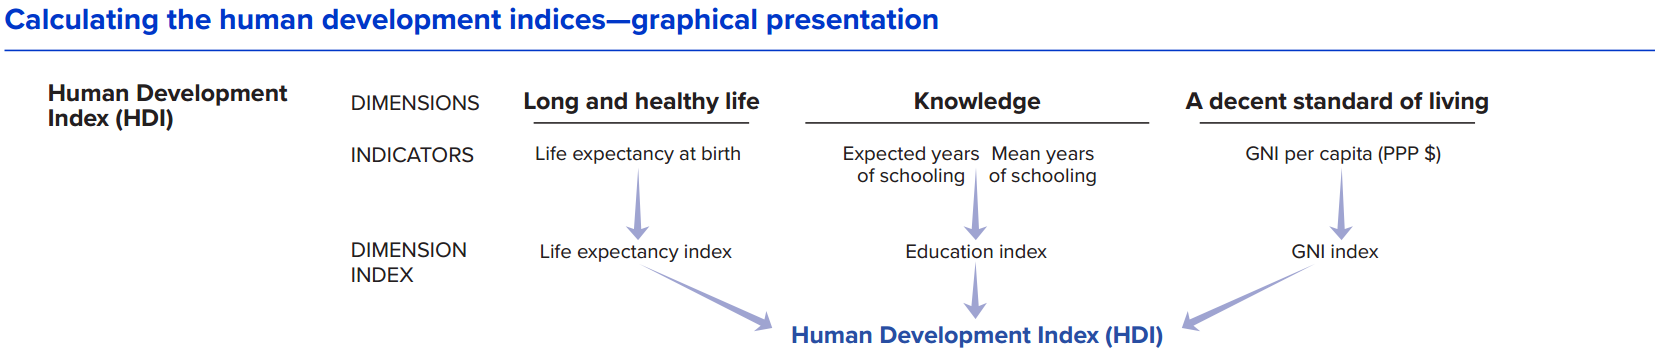

In [19]:
# Renaming the Column

#The data size is 276x15,which is not an huge dataset, hence we would not conduct a deep EDA (Exploratory Data Analysis - EDA) by randomly selecting rows to understand the data better. We already know the number of countries.
# we have set variables that constitute the Human Sevelopment Index.
# We notice that the country-wise data begins from index 7 (HDI rank (1)), and above it, indexes 3, 4 and 5 indicate the column name, column value and year, respectively. 
# first we shall rename the respective columns with the intended name.

df=dataframeObject.rename({'Unnamed: 1':'Country','Back': 'HDI_rank_2021','Unnamed: 2':'HDI_Value_2021', 'Unnamed: 4':'Life_expectancy_at_birth_yrs_2021', 'Unnamed: 6':'Expected_yrs_of_schooling_2021','Unnamed: 8':'Mean_yrs_of_schooling_2021','Unnamed: 10':'Gross_national_income_GNI_per_capita_2021','Unnamed: 12':'GNI_per_capita_rank_minus_HDI_rank_2021','Unnamed: 14':'HDI_rank_2020'}, axis=1)
df.head(20)


,HDI_rank_2021,Country,HDI_Value_2021,Unnamed: 3,Life_expectancy_at_birth_yrs_2021,Unnamed: 5,Expected_yrs_of_schooling_2021,Unnamed: 7,Mean_yrs_of_schooling_2021,Unnamed: 9,Gross_national_income_GNI_per_capita_2021,Unnamed: 11,GNI_per_capita_rank_minus_HDI_rank_2021,Unnamed: 13,HDI_rank_2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG3,NaN,SDG4.3,NaN,SDG4.4,NaN,SDG8.5,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN
5,NaN,NaN,2021,NaN,2021,NaN,2021,a,2021,a,2021,NaN,2021,b,2020
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Switzerland,0.962,NaN,83.9872,NaN,16.50029945,NaN,13.85966015,NaN,66933.00454,NaN,5,NaN,3
8,2,Norway,0.961,NaN,83.2339,NaN,18.18519974,c,13.00362968,NaN,64660.10622,NaN,6,NaN,1
9,3,Iceland,0.959,NaN,82.6782,NaN,19.16305923,c,13.76716995,NaN,55782.04981,NaN,11,NaN,2


In [21]:
# Checking for null in numeric columns

df.isnull().sum() 

#data frame is a float not numeric

HDI_rank_2021                                 84
Country                                       15
HDI_Value_2021                                63
Unnamed: 3                                   276
Life_expectancy_at_birth_yrs_2021             62
Unnamed: 5                                   275
Expected_yrs_of_schooling_2021                62
Unnamed: 7                                   175
Mean_yrs_of_schooling_2021                    62
Unnamed: 9                                   189
Gross_national_income_GNI_per_capita_2021     62
Unnamed: 11                                  265
GNI_per_capita_rank_minus_HDI_rank_2021       64
Unnamed: 13                                  275
HDI_rank_2020                                 64
dtype: int64

In [22]:
# Selecting the required column

#Selected the required columns as per the Human Development Index and its components data sheet
df1 = df[["HDI_rank_2021","Country","HDI_Value_2021", "Life_expectancy_at_birth_yrs_2021","Expected_yrs_of_schooling_2021", "Mean_yrs_of_schooling_2021",
          "Gross_national_income_GNI_per_capita_2021", "GNI_per_capita_rank_minus_HDI_rank_2021", "HDI_rank_2020" ]]
df1.head(20)

,HDI_rank_2021,Country,HDI_Value_2021,Life_expectancy_at_birth_yrs_2021,Expected_yrs_of_schooling_2021,Mean_yrs_of_schooling_2021,Gross_national_income_GNI_per_capita_2021,GNI_per_capita_rank_minus_HDI_rank_2021,HDI_rank_2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,SDG3,SDG4.3,SDG4.4,SDG8.5,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
4,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $),NaN,NaN
5,NaN,NaN,2021,2021,2021,2021,2021,2021,2020
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Switzerland,0.962,83.9872,16.50029945,13.85966015,66933.00454,5,3
8,2,Norway,0.961,83.2339,18.18519974,13.00362968,64660.10622,6,1
9,3,Iceland,0.959,82.6782,19.16305923,13.76716995,55782.04981,11,2


In [23]:
# dropping na

df1=df1.dropna()
df1.head(30)
#df1.tail(100)

,HDI_rank_2021,Country,HDI_Value_2021,Life_expectancy_at_birth_yrs_2021,Expected_yrs_of_schooling_2021,Mean_yrs_of_schooling_2021,Gross_national_income_GNI_per_capita_2021,GNI_per_capita_rank_minus_HDI_rank_2021,HDI_rank_2020
7,1,Switzerland,0.962,83.9872,16.50029945,13.85966015,66933.00454,5,3
8,2,Norway,0.961,83.2339,18.18519974,13.00362968,64660.10622,6,1
9,3,Iceland,0.959,82.6782,19.16305923,13.76716995,55782.04981,11,2
10,4,"Hong Kong, China (SAR)",0.952,85.4734,17.27816963,12.22620964,62606.8454,6,4
11,5,Australia,0.951,84.5265,21.05459023,12.72681999,49238.43335,18,5
12,6,Denmark,0.948,81.3753,18.71479988,12.96049023,60364.78595,6,5
13,7,Sweden,0.947,82.9833,19.41852951,12.60972023,54489.37401,9,9
14,8,Ireland,0.945,81.9976,18.94522095,11.58222303,76168.98443,-3,8
15,9,Germany,0.942,80.6301,17.01013947,14.09096691,54534.21682,6,7
16,10,Netherlands,0.941,81.6873,18.69316522,12.58162975,55979.411,3,10


In [24]:
#Checking for null- again
df1.isnull().sum()

HDI_rank_2021                                0
Country                                      0
HDI_Value_2021                               0
Life_expectancy_at_birth_yrs_2021            0
Expected_yrs_of_schooling_2021               0
Mean_yrs_of_schooling_2021                   0
Gross_national_income_GNI_per_capita_2021    0
GNI_per_capita_rank_minus_HDI_rank_2021      0
HDI_rank_2020                                0
dtype: int64

In [25]:
# Checking for Dataframe Attributes 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 7 to 200
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   HDI_rank_2021                              191 non-null    object
 1   Country                                    191 non-null    object
 2   HDI_Value_2021                             191 non-null    object
 3   Life_expectancy_at_birth_yrs_2021          191 non-null    object
 4   Expected_yrs_of_schooling_2021             191 non-null    object
 5   Mean_yrs_of_schooling_2021                 191 non-null    object
 6   Gross_national_income_GNI_per_capita_2021  191 non-null    object
 7   GNI_per_capita_rank_minus_HDI_rank_2021    191 non-null    object
 8   HDI_rank_2020                              191 non-null    object
dtypes: object(9)
memory usage: 14.9+ KB


In [26]:
# Exploring how data is distributed for every column

# defining numeric columns from df
numeric_cols= df1.select_dtypes(include=np.number).columns.tolist()

# figure size
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric_cols:
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        #sns.distplot(df1[column])# deprecated hence omit
        sns.histplot(df1[column])
        #sns.kdeplot(df1[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

In [27]:
# checking for datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 7 to 200
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   HDI_rank_2021                              191 non-null    object
 1   Country                                    191 non-null    object
 2   HDI_Value_2021                             191 non-null    object
 3   Life_expectancy_at_birth_yrs_2021          191 non-null    object
 4   Expected_yrs_of_schooling_2021             191 non-null    object
 5   Mean_yrs_of_schooling_2021                 191 non-null    object
 6   Gross_national_income_GNI_per_capita_2021  191 non-null    object
 7   GNI_per_capita_rank_minus_HDI_rank_2021    191 non-null    object
 8   HDI_rank_2020                              191 non-null    object
dtypes: object(9)
memory usage: 14.9+ KB


In [28]:
# Checking values to see, if we can convert the numbers to int or float data type and seeing which column is to be converted into category
df1.head(30)

,HDI_rank_2021,Country,HDI_Value_2021,Life_expectancy_at_birth_yrs_2021,Expected_yrs_of_schooling_2021,Mean_yrs_of_schooling_2021,Gross_national_income_GNI_per_capita_2021,GNI_per_capita_rank_minus_HDI_rank_2021,HDI_rank_2020
7,1,Switzerland,0.962,83.9872,16.50029945,13.85966015,66933.00454,5,3
8,2,Norway,0.961,83.2339,18.18519974,13.00362968,64660.10622,6,1
9,3,Iceland,0.959,82.6782,19.16305923,13.76716995,55782.04981,11,2
10,4,"Hong Kong, China (SAR)",0.952,85.4734,17.27816963,12.22620964,62606.8454,6,4
11,5,Australia,0.951,84.5265,21.05459023,12.72681999,49238.43335,18,5
12,6,Denmark,0.948,81.3753,18.71479988,12.96049023,60364.78595,6,5
13,7,Sweden,0.947,82.9833,19.41852951,12.60972023,54489.37401,9,9
14,8,Ireland,0.945,81.9976,18.94522095,11.58222303,76168.98443,-3,8
15,9,Germany,0.942,80.6301,17.01013947,14.09096691,54534.21682,6,7
16,10,Netherlands,0.941,81.6873,18.69316522,12.58162975,55979.411,3,10


In [29]:
# First converting 'country' column into Category Datatype 
str_cols=['Country']
for col in str_cols:
    df1[col]=df1[col].astype('category')

In [30]:
# Second converting the remaing columns into float, as these are values with decimal (as HDI_Value_2021 column has values less than 1)
float_cols=['HDI_rank_2021','HDI_Value_2021', 'Life_expectancy_at_birth_yrs_2021','Expected_yrs_of_schooling_2021', 'Mean_yrs_of_schooling_2021','Gross_national_income_GNI_per_capita_2021', 'GNI_per_capita_rank_minus_HDI_rank_2021', 'HDI_rank_2020']
for col in float_cols:
    df1[col]=df1[col].astype('float')

In [31]:
# checking mean for one column
mean_HDI = df1['HDI_Value_2021'].mean()
print("Mean HDI Value for 2021:", mean_HDI)

Mean HDI Value for 2021: 0.7205759162303664


In [32]:
# Checking if the Datatypes have changed
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 7 to 200
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   HDI_rank_2021                              191 non-null    float64 
 1   Country                                    191 non-null    category
 2   HDI_Value_2021                             191 non-null    float64 
 3   Life_expectancy_at_birth_yrs_2021          191 non-null    float64 
 4   Expected_yrs_of_schooling_2021             191 non-null    float64 
 5   Mean_yrs_of_schooling_2021                 191 non-null    float64 
 6   Gross_national_income_GNI_per_capita_2021  191 non-null    float64 
 7   GNI_per_capita_rank_minus_HDI_rank_2021    191 non-null    float64 
 8   HDI_rank_2020                              191 non-null    float64 
dtypes: category(1), float64(8)
memory usage: 19.4 KB


In [33]:
# Since the datatypes are as desired, 
# we next check for duplicate values
df1.duplicated().sum()

0

In [34]:
# Next we check for null
df1.isnull().sum()

HDI_rank_2021                                0
Country                                      0
HDI_Value_2021                               0
Life_expectancy_at_birth_yrs_2021            0
Expected_yrs_of_schooling_2021               0
Mean_yrs_of_schooling_2021                   0
Gross_national_income_GNI_per_capita_2021    0
GNI_per_capita_rank_minus_HDI_rank_2021      0
HDI_rank_2020                                0
dtype: int64

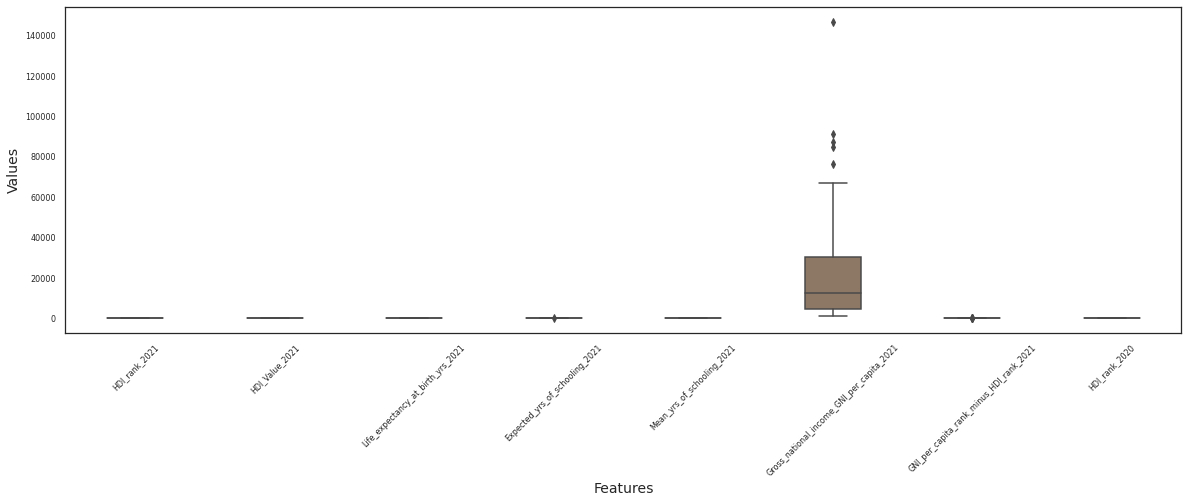

In [35]:
# Nexy we try to plot box plot to understand data better

fig, ax=plt.subplots(figsize=(20,6))
sns.boxplot(data = df1, width = 0.4, ax=ax)
ax.set_xlabel('Features',fontsize=14)
ax.set_ylabel('Values',fontsize=14)
ax.tick_params(axis='x', labelsize=8, rotation=45)
ax.tick_params(axis='y', labelsize=8)
plt.show()

Data for countries Korea (Democratic People's Rep. of), Monaco, Nauru and Somalia are missing Hence they have not been considered. 

### 5. Comprehensive Analysis and Methods

In [36]:
# SUMMARY Statistics for df1

summary=df1.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
HDI_rank_2021,191.0,95.81,55.31,1.00,48.50,96.00,143.50,191.00
HDI_Value_2021,191.0,0.72,0.15,0.38,0.60,0.74,0.84,0.96
Life_expectancy_at_birth_yrs_2021,191.0,71.31,7.65,52.53,65.75,71.69,76.70,85.47
Expected_yrs_of_schooling_2021,191.0,13.53,2.92,5.54,11.60,13.40,15.62,21.05
Mean_yrs_of_schooling_2021,191.0,8.99,3.17,2.11,6.25,9.31,11.50,14.09
Gross_national_income_GNI_per_capita_2021,191.0,20249.09,21825.28,731.79,4592.92,12306.34,30079.79,146829.70
GNI_per_capita_rank_minus_HDI_rank_2021,191.0,0.19,14.06,-47.00,-8.00,2.00,9.00,37.00
HDI_rank_2020,191.0,95.81,55.28,1.00,48.50,96.00,143.00,191.00


The average HDI rank for all the countries is 95.81 with a std of 55.3. The data set has 75% of the countries with an HDI rank of 143.5 or lower. The mean HDI value is 0.72. The mean life expectancy is 71.31 years (min 52 years and max 85 yrs). Expected years of schooling have a mean of 13.53 (min 5.54 yrs and max 21.05 yrs). The mean of mean years of schooling was observed as 8.99 yrs (min 2 yrs max 14 yrs). GNI per capita mean is 20249.09 USD (min 731 USD and max 146829.7 USD), and the median of GNI per capita is 12306.34 USD meaning half of the countries have a GNI per capita lower that this value. 

In [37]:
mean_HDI = df1['HDI_Value_2021'].mean()
print("Mean HDI Value for 2021:", mean_HDI)

Mean HDI Value for 2021: 0.7205759162303664


In [38]:
# SEPARATING dependent and independent variables based on the Human Development Indices (Indicated in Figure-1)
df2 = df1.drop(['Country','HDI_Value_2021','HDI_rank_2021','GNI_per_capita_rank_minus_HDI_rank_2021','HDI_rank_2020'], axis=1)

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 7 to 200
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Life_expectancy_at_birth_yrs_2021          191 non-null    float64
 1   Expected_yrs_of_schooling_2021             191 non-null    float64
 2   Mean_yrs_of_schooling_2021                 191 non-null    float64
 3   Gross_national_income_GNI_per_capita_2021  191 non-null    float64
dtypes: float64(4)
memory usage: 7.5 KB


In [40]:
print("Number of rows: ", df1.shape[0])
print("Number of columns: ", df1.shape[1])

Number of rows:  191
Number of columns:  9


In [41]:
df1.head(30)

,HDI_rank_2021,Country,HDI_Value_2021,Life_expectancy_at_birth_yrs_2021,Expected_yrs_of_schooling_2021,Mean_yrs_of_schooling_2021,Gross_national_income_GNI_per_capita_2021,GNI_per_capita_rank_minus_HDI_rank_2021,HDI_rank_2020
7,1.0,Switzerland,0.962,83.9872,16.500299,13.859660,66933.00454,5.0,3.0
8,2.0,Norway,0.961,83.2339,18.185200,13.003630,64660.10622,6.0,1.0
9,3.0,Iceland,0.959,82.6782,19.163059,13.767170,55782.04981,11.0,2.0
10,4.0,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.84540,6.0,4.0
11,5.0,Australia,0.951,84.5265,21.054590,12.726820,49238.43335,18.0,5.0
12,6.0,Denmark,0.948,81.3753,18.714800,12.960490,60364.78595,6.0,5.0
13,7.0,Sweden,0.947,82.9833,19.418530,12.609720,54489.37401,9.0,9.0
14,8.0,Ireland,0.945,81.9976,18.945221,11.582223,76168.98443,-3.0,8.0
15,9.0,Germany,0.942,80.6301,17.010139,14.090967,54534.21682,6.0,7.0
16,10.0,Netherlands,0.941,81.6873,18.693165,12.581630,55979.41100,3.0,10.0


We know that the average Life_expectancy_at_birth_2021 is 70.80, meaning at birth a new born could expect to live an average  , with Expected_yrs_of_schooling_2021 as 13.05, and average years of schooling is observed to be 8.5 years

read: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3131#:~:text=Definition%3A,%2C%20territory%2C%20or%20geographic%20area. 


https://www.oecd-ilibrary.org/social-issues-migration-health/life-expectancy-at-birth/indicator/english_27e0fc9d-en#:~:text=Life%20expectancy%20at%20birth%20is%20one%20of%20the%20most%20frequently,access%20to%20quality%20health%20services. 


#### Assumptions

    A. Independence
    B. Homoscedasticity
    C. Multicollinearity

A. **Independence**: Satisfied as only a single year 2021 is considered.

B. **Homoscedasticity**: To check relationship between independent variables.

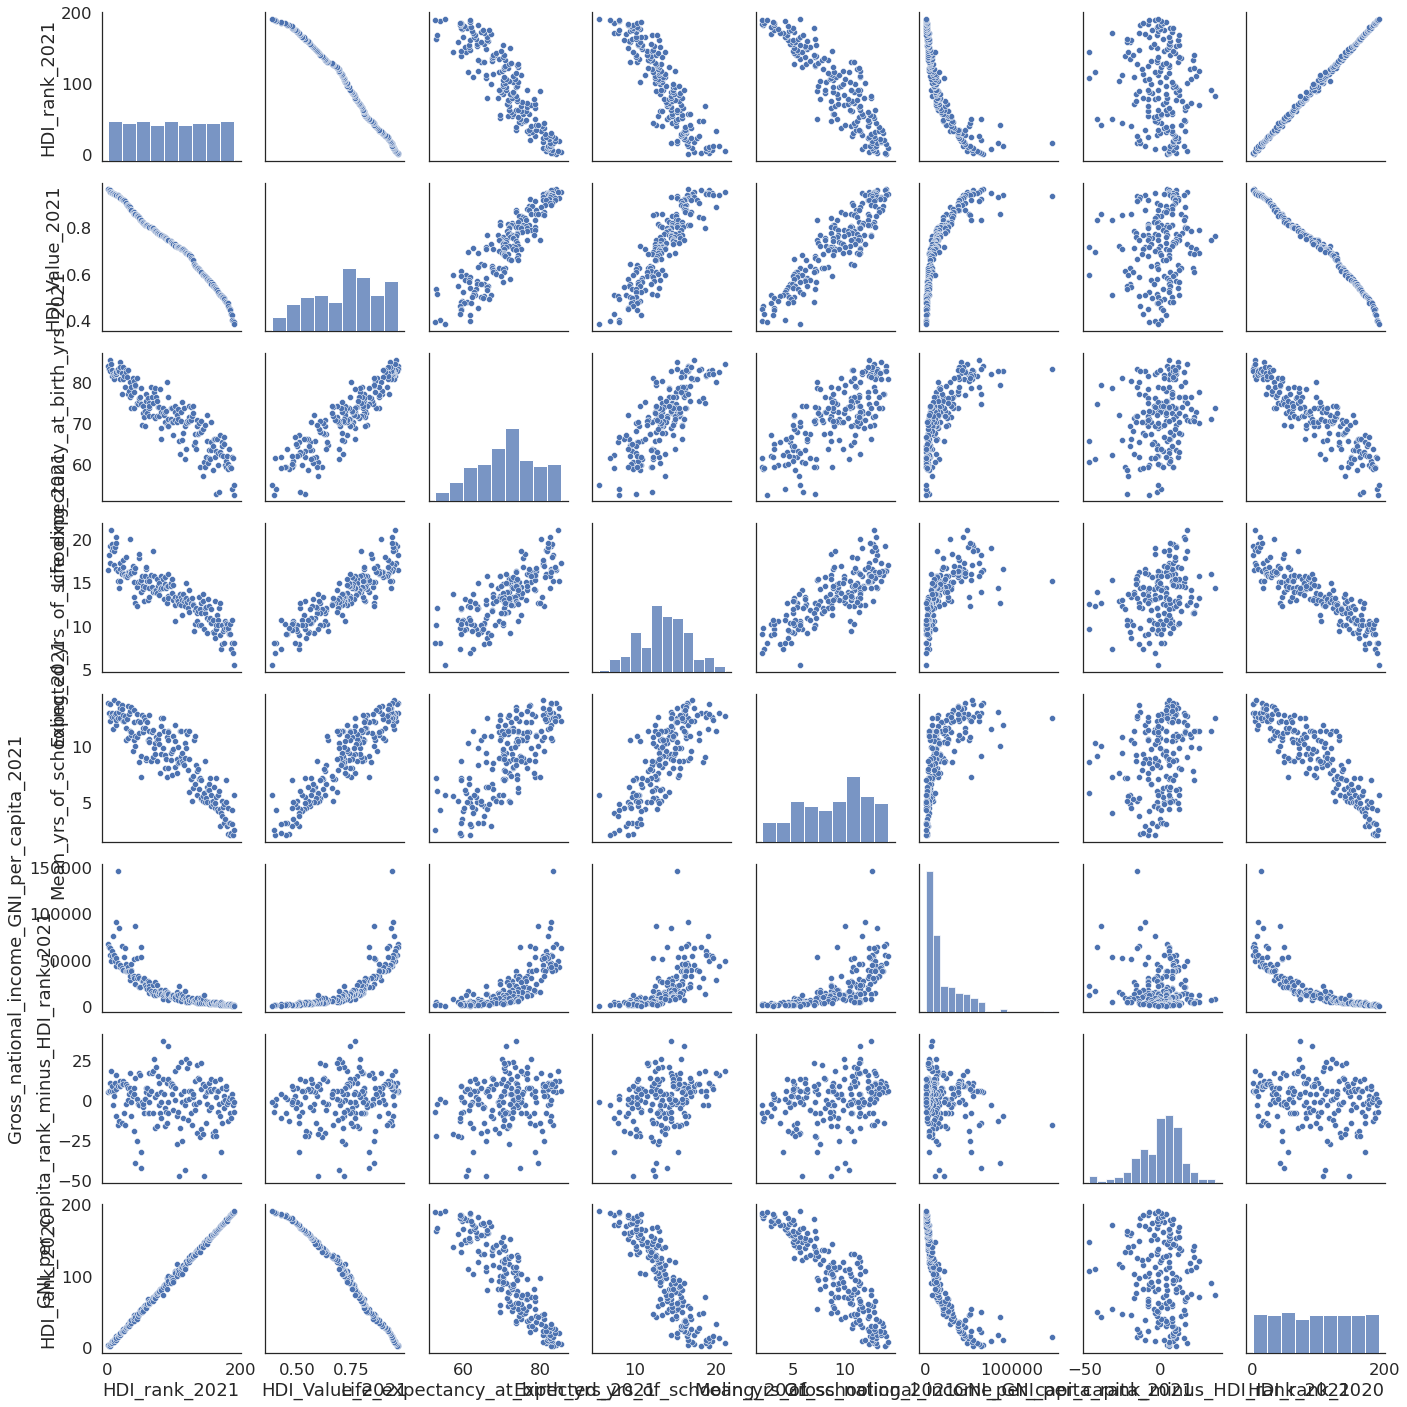

In [42]:
# create a pairplot of selected columns
pairplot=sns.pairplot(df1)
pairplot.savefig('pair_plot.png')

3. **Multicollinearity**

Text(0.5, 1.0, 'Correlation Matrix')

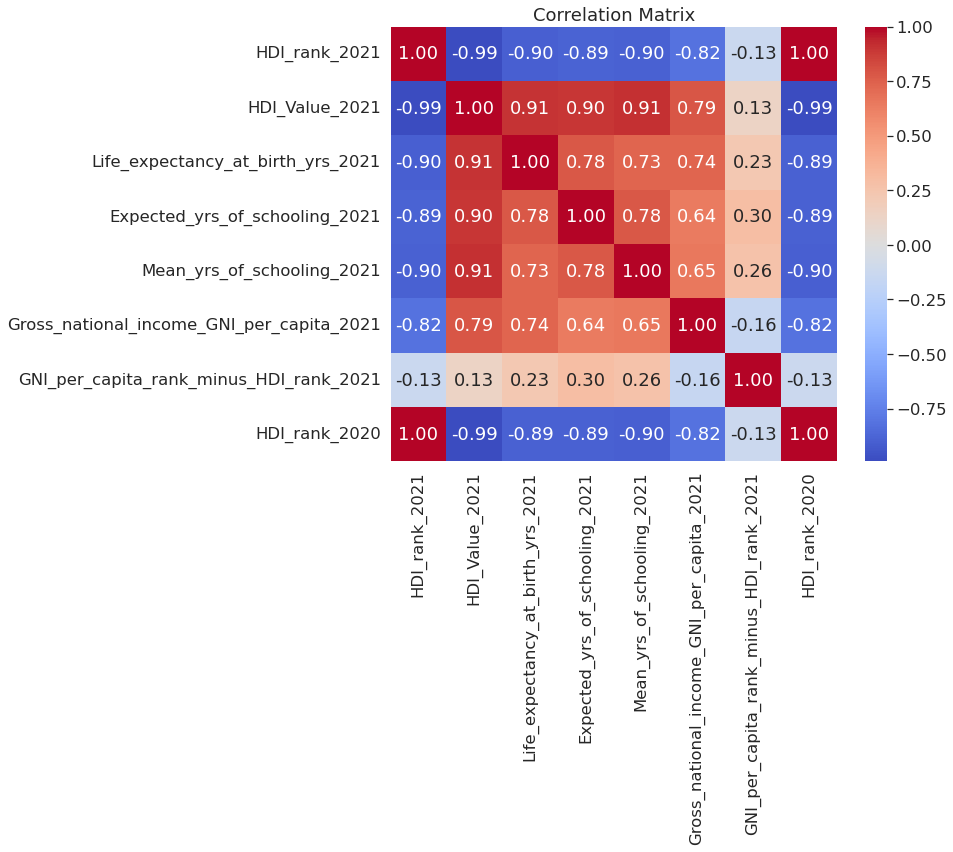

In [45]:
## Correlation Matrix
sns.heatmap(df1.corr(), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

In [46]:
# create a correlation matrix
corr_matrix = df1.corr()

# create a table of correlation matrix
corr_table = corr_matrix.round(2)

# print the correlation table
print(corr_table)

                                           HDI_rank_2021  HDI_Value_2021  \
HDI_rank_2021                                       1.00           -0.99   
HDI_Value_2021                                     -0.99            1.00   
Life_expectancy_at_birth_yrs_2021                  -0.90            0.91   
Expected_yrs_of_schooling_2021                     -0.89            0.90   
Mean_yrs_of_schooling_2021                         -0.90            0.91   
Gross_national_income_GNI_per_capita_2021          -0.82            0.79   
GNI_per_capita_rank_minus_HDI_rank_2021            -0.13            0.13   
HDI_rank_2020                                       1.00           -0.99   

                                           Life_expectancy_at_birth_yrs_2021  \
HDI_rank_2021                                                          -0.90   
HDI_Value_2021                                                          0.91   
Life_expectancy_at_birth_yrs_2021                                       1.0

In [47]:
# CALCULATING VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


In [48]:
ind_vars=['HDI_rank_2021','HDI_Value_2021', 'Life_expectancy_at_birth_yrs_2021','Expected_yrs_of_schooling_2021', 'Mean_yrs_of_schooling_2021','Gross_national_income_GNI_per_capita_2021', 'GNI_per_capita_rank_minus_HDI_rank_2021', 'HDI_rank_2020']

vif = drop_column_using_vif_(df1[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 489.34838973825464
Dropping: HDI_rank_2021
Max VIF: 306.37838706880035
Dropping: HDI_Value_2021
Max VIF: 51.37822375740405
Dropping: HDI_rank_2020
Max VIF: 3.77563235218765
The columns remaining after VIF selection are:
Index(['Life_expectancy_at_birth_yrs_2021', 'Expected_yrs_of_schooling_2021',
       'Mean_yrs_of_schooling_2021',
       'Gross_national_income_GNI_per_capita_2021',
       'GNI_per_capita_rank_minus_HDI_rank_2021'],
      dtype='object')


we shall be removing GNI_per_capita_rank_minus_HDI_rank_2021 as it is not mentioned in the technical notes as a indicator.  

#### PCA- to reduce dimension

In [66]:
#the variables are continous variables
#to identify linear combination of the original variables, to explain most of the variance
#to reduce overfitting and improve acuracy of the model
list_var_X=['Life_expectancy_at_birth_yrs_2021', 'Expected_yrs_of_schooling_2021',
        'Mean_yrs_of_schooling_2021',
        'Gross_national_income_GNI_per_capita_2021']
X =df1[list_var_X].values
y = df1['HDI_Value_2021'].values
X = StandardScaler().fit_transform(X)
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X) # the list_var_X is used as the column names
df_PrincipleComp

,Life_expectancy_at_birth_yrs_2021,Expected_yrs_of_schooling_2021,Mean_yrs_of_schooling_2021,Gross_national_income_GNI_per_capita_2021
0,0.515117,0.507054,0.500971,0.476003
1,0.090120,-0.436702,-0.407757,0.796809
2,-0.582403,-0.330383,0.701573,0.243821
3,-0.622366,0.665609,-0.300927,0.281191


In [67]:
cluster.biplot(cscore=X_new_components, loadings=pca.components_, 
               labels=df_PrincipleComp.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2))

In [68]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.79035614 0.09997805 0.0624641  0.0472017 ]


In [69]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[3.17806364 0.40201702 0.25117145 0.18980052]


In [70]:
first_pc=pca.components_[0]
second_pc=pca.components_[1]
third_pc=pca.components_[2]
print("First Principal Component:", first_pc)
print("Second Principal Component:", second_pc)
print("Third Principal Component:", third_pc)

First Principal Component: [0.51511708 0.50705356 0.50097134 0.47600294]
Second Principal Component: [ 0.09012012 -0.43670181 -0.4077569   0.79680876]
Third Principal Component: [-0.58240301 -0.33038304  0.7015733   0.243821  ]


Text(0, 0.5, 'PC2')

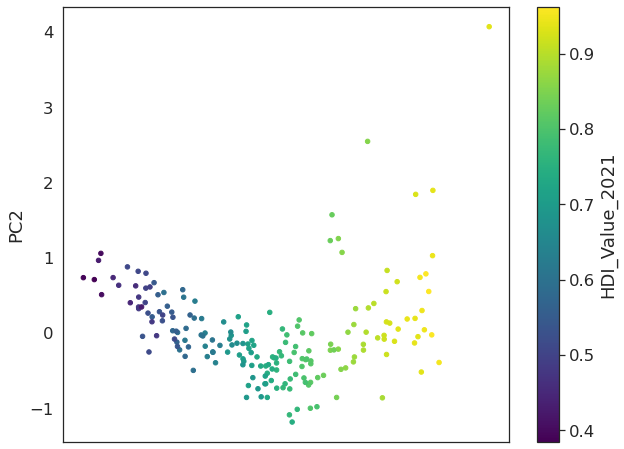

In [71]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the HDI_Value_2021 variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(HDI_Value_2021=y)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "HDI_Value_2021", colormap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

One observation is that PC=2 is a transition point, as the plot decreases very quickly before this point and then becomes very flat after it. Therefore, two components should be chosen.

In practice, you can decide which rule to use.

In [72]:
pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)

#print the variance ration of each principal component (PC1, 
print(pca.explained_variance_ratio_)
#"...{:.2f}.format() to print float number as a string output
print ("Variance explained by PC1:{:.2F}".format(pca.explained_variance_ratio_[0]))
print ("Variance explained by PC2:{:.2F}".format(pca.explained_variance_ratio_[1]))
print ("Variance explained by PC3:{:.2F}".format(pca.explained_variance_ratio_[2]))

[0.79035614 0.09997805 0.0624641 ]
Variance explained by PC1:0.79
Variance explained by PC2:0.10
Variance explained by PC3:0.06


PC1 explains the highest variance (79%) in the data. A positive correlation is observed with all four variables, indicating that a country with high scores in all variables will have a higher HDI score. In PC1, the highest loading is observed in 'Life expectancy at birth' (0.515), indicating its most significant impact on HDI.

PC2 explains 10% of the variance. A negative correlation is observed in 'Expected yrs of schooling'  & 'Mean yrs of schooling' and positive with 'GNI per capita' (0.796), indicating that countries with higher 'GNI per capita' are likely to have a higher HDI score (stronger predictor of HDI) whereas, countries with higher 'expected years of schooling' and 'mean years of schooling' may have a lower HDI (education may not be strongly correlated with HDI).   

PC3 explains 6% of the variance and is negatively correlated with 'Expected years of schooling' and positively with 'mean years of schooling', meaning if the expected duration of education of a child decreases then the average duration of education received increases leading to an increase in PC3 and higher PC3 implies higher HDI score for a country. PC3 captures the second dimension of HDI (knowledge) which is not captured in the above components.

To understand how much of the variation in HDI can be explained by these variables, we shall conduct a regression analysis. (Strongest relationship with HDI scores)

#### Regression analysis with PCA

In [74]:
# Regression analysis
pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)

#creating a dataframe containing the principal components
# PC1 (64%), PC2(22%) showcase most of the important variable
# we shall also include PC3 (6%) as it is relatively smaller to PC1 and PC2, but explaination of 6% variance seems significant to understand finer details  
X_new_components = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

#split the data into traiing and test set
# splitting data into training and test sets
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(X_new_components,y,test_size=0.2,random_state=random_state_split)

# fit in regression model
LReg= make_pipeline(StandardScaler(),LinearRegression())
LReg.fit(train_x, train_y)

# making predictions on the test set
pred_y=LReg.predict(test_x)

# Calculating MSE (Mean Squared Error) 
mse= mean_squared_error(test_y, pred_y)
print("Mean Squared Error: ", mse)

# Calulating the R-squared score
r_squared= LReg.score(test_x, test_y)
print("R-Squared: ", r_squared)

#print coefficients
print("Coefficients:" , LReg[-1].coef_)

#Print Intercept
print("Intercept:" , LReg[-1].intercept_)

#Print the R-squared score
print("R-squared score:" , LReg.score(test_x, test_y))

Mean Squared Error:  0.0007774611749805369
R-Squared:  0.9608318280023915
Coefficients: [ 0.14935605 -0.00762793  0.00362019]
Intercept: 0.7270986842105264
R-squared score: 0.9608318280023915


0.00077 (MSE) indicates that the model fits the data well. 0.960 (R-Squared) indicates that PC1, PC2, and PC2 explain a larger portion of the variance in the HDI score (96%). The positive coefficients of PC1 and PC3 suggest that higher values are associated with higher HDI scores, and the negative coefficient of PC2 suggests that higher values of PC2 are associated with lower HDI scores. The intercept helps us understand the baseline value of HDI of the countries even before taking PC into account. The intercept suggests that even when all the principal components are zero, the expected HDI score is still relatively high, meaning that the countries included have a relatively higher HDI score on average. 
The R2 value suggests that all these components have a strong relationship with HDI scores, and a regression model can be used to predict HDI scores based on the PC. 

#### Ridge Regression with PCA

In [138]:
# to improve the acuracy of our model prediction  
# Ridge Regression analysis
pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)

#creating a dataframe containing the principal components
X_new_components = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

#split the data into traiing and test set
# splitting data into training and test sets
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(X_new_components,y,test_size=0.2,random_state=random_state_split)

# fit in regression model
RidgeReg= make_pipeline(StandardScaler(with_mean=False),Ridge(alpha=0.05))
RidgeReg.fit(train_x, train_y)

# making predictions on the test set
pred_y=RidgeReg.predict(test_x)

# Calculating MSE (Mean Squared Error) 
mse= mean_squared_error(test_y, pred_y)
print("Mean Squared Error: ", mse)

# Calulating the R-squared score
r_squared= RidgeReg.score(test_x, test_y)
print("R-Squared: ", r_squared)

#print coefficients
print("Coefficients:" , RidgeReg[-1].coef_)

#Print Intercept
print("Intercept:" , RidgeReg[-1].intercept_)

#Print the R-squared score
print("R-squared score:" , RidgeReg.score(test_x, test_y))

Mean Squared Error:  0.0010110038105473425
R-Squared:  0.9490660467479328
Coefficients: [0.14846819 0.01699506 0.01199769]
Intercept: 0.721829743161882
R-squared score: 0.9490660467479328


#### Lasso Regression with PCA

In [139]:
# other trype of regularized regression to improve predictive performance
# Lasso Regression analysis
pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)

#creating a dataframe containing the principal components
X_new_components = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])   

# splitting data into training and test sets
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(X_new_components,y,test_size=0.2,random_state=random_state_split)

# fit in regression model
LassoReg= make_pipeline(StandardScaler(with_mean=False),LassoCV(cv=5))
LassoReg.fit(train_x, train_y)

# making predictions on the test set
pred_y=LassoReg.predict(test_x)

# Calculating MSE (Mean Squared Error) 
mse= mean_squared_error(test_y, pred_y)
print("Mean Squared Error: ", mse)

# Calulating the R-squared score
r_squared= LassoReg.score(test_x, test_y)
print("R-Squared: ", r_squared)

#print coefficients
print("Coefficients:" , LassoReg[-1].coef_)

#Print Intercept
print("Intercept:" , LassoReg[-1].intercept_)

#Print the R-squared score
print("R-squared score:" , LassoReg.score(test_x, test_y))

Mean Squared Error:  0.001007687186837082
R-Squared:  0.9492331368768233
Coefficients: [0.14837283 0.01686123 0.01186821]
Intercept: 0.7218375439429221
R-squared score: 0.9492331368768233


The results of the Lasso regression are similar to that of Ridge, with a slightly lower MSE and slightly higher R2. The coefficients and intercept have similar values. PC1 has the largest coefficient (0.148), meaning it has a stronger relationship with the HDI score and is the most important predictor of the HDI score. This output is consistent with the Principal Component Analysis where PC1 explained the most variance. In summary, the factors that contribute the most to the HDI score are primarily captured in PC1 followed by other principal components but to a lesser extent. 

#### Random Forest with PCA

In [78]:
# Random Forest
# Ref: https://data36.com/random-forest-in-python/
# to understand nonlinear relationship btw predictor and HDI score

pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)    

#creating a dataframe containing the principal components
X_new_components = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])  

# splitting data into training and test sets
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(X_new_components,y,test_size=0.2,random_state=random_state_split)

# fit in regression model
rf_model= RandomForestRegressor(n_estimators=50, max_features=1.0, random_state=44)
rf_model.fit(train_x, train_y)

# making predictions on the test set
pred_y=rf_model.predict(test_x)

#feature importance
importance=rf_model.feature_importances_
columns=test_x.columns
i=0
while i<len(columns):
    print(f" The importance of features' {columns[i]}' is { round(importance[i]*100, 2)}%,")
    i+=1

# Calculating MSE (Mean Squared Error) 
mse= mean_squared_error(test_y, pred_y)
print("Mean Squared Error: ", mse)

# Calulating the R-squared score
r_squared= rf_model.score(test_x, test_y)
print("R-Squared: ", r_squared)

 The importance of features' PC1' is 99.41%,
 The importance of features' PC2' is 0.23%,
 The importance of features' PC3' is 0.37%,
Mean Squared Error:  0.0005319246358974366
R-Squared:  0.9732018571485352


The the largest importance is of PC1 (99.41 %) which means it explains most of the variation is the data analysis, and has the greatest influence in the model's prediction, followed by PC3 and PC2. the MSE is low suggesting that the model makes accurate predictions. R2 value indicates that the model fits the data well and can explain most of the variance. 

#### Cluster Analysis

[[ 0.17020037 -0.38927111  0.0184153 ]
 [-2.08179381  0.24918865 -0.01785099]
 [ 2.40088254  0.39427665 -0.01074438]]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

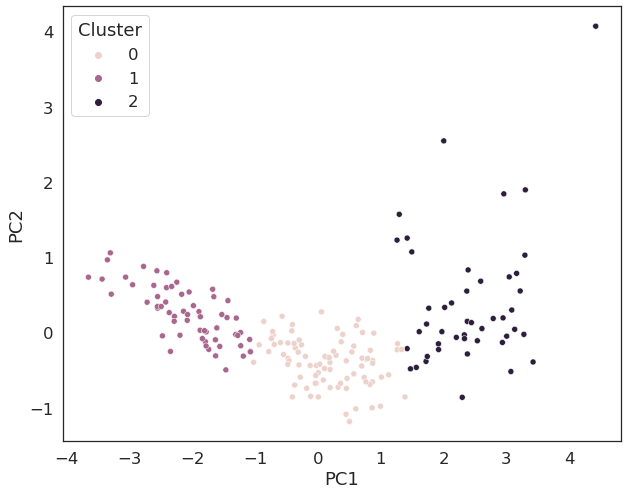

In [80]:
#to group countries on the factors that have the most significant impact on HDI Score
pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)

#creating a dataframe containing the principal components
X_new_components = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']) 

k=3
random_seed = 0
# perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=random_seed)
clusters = kmeans.fit_predict(X_new_components)

# add the cluster information to the original dataframe
df_clustered = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_clustered['Cluster'] = kmeans.labels_

# print the cluster centers
print(kmeans.cluster_centers_)

# visualize the clusters using scatter plot
sns.scatterplot(data=df_clustered, x='PC1', y='PC2', hue='Cluster') 

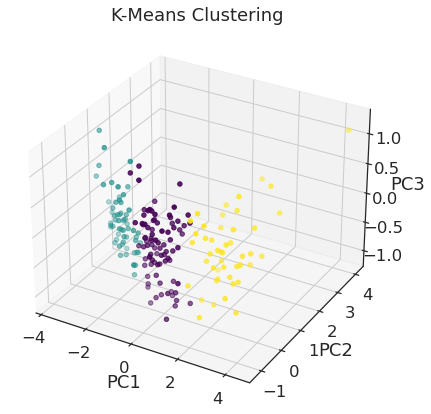

In [81]:
#visualize in 3d, given there are 3 components
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x=df_clustered.iloc[:,0]
y=df_clustered.iloc[:,1]
z=df_clustered.iloc[:,2]

ax.scatter(x,y,z, c=kmeans.labels_, cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('K-Means Clustering')
plt.show()


### Finding the 'right' number of cluster

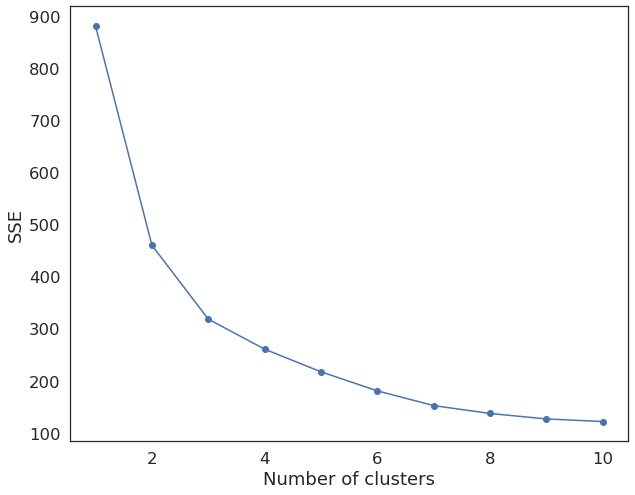

In [141]:
# calculate SSE for a range of number of clusters
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

for i in range_k:
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans.fit(X_pca)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(kmeans.inertia_)

# plot SSE vs number of clusters
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show() 


SSE starts to level off after 3 clusters and the rate of decrease in SSE slows down. This indicates that additional clusters do not provide much improvement in the model's performance. 

In [143]:
print(pca.explained_variance_ratio_)

[0.64192985 0.22458033 0.05616637]


64.19% of the total variance in the data is explained by PC1, followed by PC2 and PC3.

In [107]:
## checking if countries name correspond to pca

#fit and transform X
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

#creating a dataframe containing the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3']) 

#checking if index is similar
if all(df_pca.index==df1.index):
    print("Index is the same")
else:
    print("Index is not the same")
    

Index is not the same


#### ANOVA

In [108]:
#since index is not the same, we need to reset the index. df1 remains unchanged. 
df_pca=df_pca.set_index(df1.index) #returns a new df with modified index

#rechecking if the index is same
if all(df_pca.index==df1.index):
    print("Index is the same post resetting index")
else:
    print("Index is not the same post resetting index")

Index is the same post resetting index


In [109]:
#adding country names to df_pca
df_pca['Country_Name']=df1['Country']

In [110]:
df_pca.head(10)

,PC1,PC2,PC3,Country_Name
7,3.163799,0.786826,0.298957,Switzerland
8,3.220690,0.552687,-0.049585,Norway
9,3.279881,-0.023647,-0.048138,Iceland
10,3.046319,0.739965,-0.313166,"Hong Kong, China (SAR)"
11,3.425873,-0.390567,-0.707465,Australia
12,3.086474,0.299746,-0.025312,Denmark
13,3.133458,0.043485,-0.371397,Sweden
14,3.296031,1.028644,-0.227401,Ireland
15,2.791163,0.187158,0.409973,Germany
16,2.947931,0.194952,-0.179779,Netherlands


0    85
1    60
2    46
Name: Cluster_Labels, dtype: int64


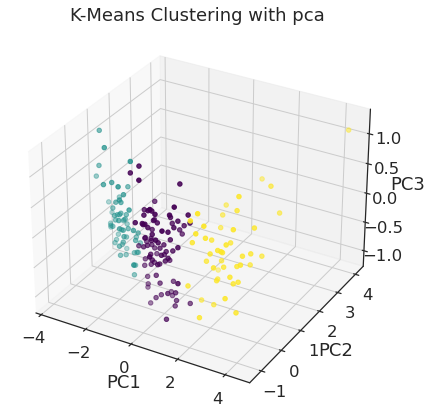

In [111]:
# let us perform clustering analysis
#pca= PCA(n_components=3)
#X_pca= pca.fit_transform(X)

#creating a dataframe containing the principal components
#X_new_components = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']) 

k=3
random_seed = 0
# perform KMeans clustering
kmeans2 = KMeans(n_clusters=k, random_state=random_seed)

#droping categorical variable
clusters2 = kmeans2.fit(df_pca.drop('Country_Name', axis=1))

#creating a new coulumn in the datafarme (cluster labels)
df_pca['Cluster_Labels']=kmeans2.labels_

#print the count of countries in each cluster
print(df_pca['Cluster_Labels'].value_counts())

#scatter plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],df_pca.iloc[:,2], c=kmeans2.labels_, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('K-Means Clustering with pca')
plt.show()

In [112]:
#viewing cluster labels and the respective country
print(df_pca[['Country_Name', 'Cluster_Labels']])

                           Country_Name  Cluster_Labels
7                           Switzerland               2
8                                Norway               2
9                               Iceland               2
10               Hong Kong, China (SAR)               2
11                            Australia               2
12                              Denmark               2
13                               Sweden               2
14                              Ireland               2
15                              Germany               2
16                          Netherlands               2
17                              Finland               2
18                            Singapore               2
19                              Belgium               2
20                          New Zealand               2
21                               Canada               2
22                        Liechtenstein               2
23                           Luxembourg         

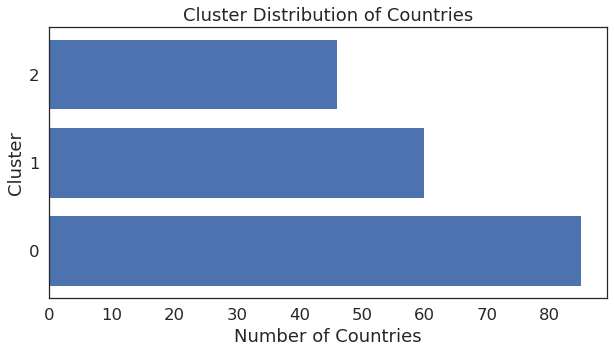

In [99]:
# bar chart to visualize the count

#number of countries in each cluster
cluster_counts=df_pca['Cluster_Labels'].value_counts()

#creating horizontal bar chart
fig,ax=plt.subplots(figsize=(10,5))
ax.barh(cluster_counts.index.astype(str),cluster_counts.values)

#chart title
ax.set_title('Cluster Distribution of Countries')
ax.set_xlabel('Number of Countries')
ax.set_ylabel('Cluster')

#plot
plt.show()

In [100]:
#grouping the countries by cluster label
cluster_groups=df_pca.groupby('Cluster_Labels')
for Cluster_Labels, group in cluster_groups:
    print(f'cluster {Cluster_Labels}:{", ".join(map(str,group.index))}')

cluster 0:51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 142
cluster 1:138, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200
cluster 2:7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 56, 57


In [101]:
#viewing clusters and country names
cluster_list = []
cluster_df = pd.DataFrame(cluster_list) 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 

for cluster_label, group in cluster_groups:
    countries = ",".join(df_pca.loc[group.index]['Country_Name'].values)
    cluster_dict = {'Cluster': cluster_label, 'Countries': countries}
    cluster_list.append(cluster_dict)

cluster_df = pd.DataFrame(cluster_list) 
cluster_df.head(3)

,Cluster,Countries
0,0,"Slovakia,Hungary,Argentina,Türkiye,Montenegro,Russian Federation,Romania,Oman,Bahamas,Kazakhstan,Trinidad and Tobago,Costa Rica,Uruguay,Belarus,Panama,Malaysia,Georgia,Mauritius,Serbia,Thailand,Albania,Bulgaria,Grenada,Barbados,Antigua and Barbuda,Seychelles,Sri Lanka,Bosnia and Herzegovina,Saint Kitts and Nevis,Iran (Islamic Republic of),Ukraine,North Macedonia,China,Dominican Republic,Moldova (Republic of),Palau,Cuba,Peru,Armenia,Mexico,Brazil,Colombia,Saint Vincent and the Grenadines,Maldives,Algeria,Azerbaijan,Tonga,Turkmenistan,Ecuador,Mongolia,Egypt,Tunisia,Fiji,Suriname,Uzbekistan,Dominica,Jordan,Libya,Paraguay,Palestine, State of,Saint Lucia,Guyana,South Africa,Jamaica,Samoa,Gabon,Lebanon,Indonesia,Viet Nam,Philippines,Botswana,Bolivia (Plurinational State of),Kyrgyzstan,Venezuela (Bolivarian Republic of),Iraq,Tajikistan,Belize,Morocco,El Salvador,Nicaragua,Bhutan,Cabo Verde,Bangladesh,Marshall Islands,Micronesia (Federated States of)"
1,1,"Tuvalu,India,Ghana,Guatemala,Kiribati,Honduras,Sao Tome and Principe,Namibia,Lao People's Democratic Republic,Timor-Leste,Vanuatu,Nepal,Eswatini (Kingdom of),Equatorial Guinea,Cambodia,Zimbabwe,Angola,Myanmar,Syrian Arab Republic,Cameroon,Kenya,Congo,Zambia,Solomon Islands,Comoros,Papua New Guinea,Mauritania,Côte d'Ivoire,Tanzania (United Republic of),Pakistan,Togo,Haiti,Nigeria,Rwanda,Benin,Uganda,Lesotho,Malawi,Senegal,Djibouti,Sudan,Madagascar,Gambia,Ethiopia,Eritrea,Guinea-Bissau,Liberia,Congo (Democratic Republic of the),Afghanistan,Sierra Leone,Guinea,Yemen,Burkina Faso,Mozambique,Mali,Burundi,Central African Republic,Niger,Chad,South Sudan"
2,2,"Switzerland,Norway,Iceland,Hong Kong, China (SAR),Australia,Denmark,Sweden,Ireland,Germany,Netherlands,Finland,Singapore,Belgium,New Zealand,Canada,Liechtenstein,Luxembourg,United Kingdom,Japan,Korea (Republic of),United States,Israel,Malta,Slovenia,Austria,United Arab Emirates,Spain,France,Cyprus,Italy,Estonia,Czechia,Greece,Poland,Bahrain,Lithuania,Saudi Arabia,Portugal,Latvia,Andorra,Croatia,Chile,Qatar,San Marino,Kuwait,Brunei Darussalam"


In [102]:
df_pca.columns


Index(['PC1', 'PC2', 'PC3', 'Country_Name', 'Cluster_Labels'], dtype='object')

In [103]:
#calculating HDI mean for each cluster
#merging HDI_Value_2021 from df1 
df_pca_hdi=pd.merge(df_pca, df1[['Country', 'HDI_Value_2021']], left_on='Country_Name', right_on='Country')
df_pca_hdi.head(20)

,PC1,PC2,PC3,Country_Name,Cluster_Labels,Country,HDI_Value_2021
0,3.163799,0.786826,0.298957,Switzerland,2,Switzerland,0.962
1,3.220690,0.552687,-0.049585,Norway,2,Norway,0.961
2,3.279881,-0.023647,-0.048138,Iceland,2,Iceland,0.959
3,3.046319,0.739965,-0.313166,"Hong Kong, China (SAR)",2,"Hong Kong, China (SAR)",0.952
4,3.425873,-0.390567,-0.707465,Australia,2,Australia,0.951
5,3.086474,0.299746,-0.025312,Denmark,2,Denmark,0.948
6,3.133458,0.043485,-0.371397,Sweden,2,Sweden,0.947
7,3.296031,1.028644,-0.227401,Ireland,2,Ireland,0.945
8,2.791163,0.187158,0.409973,Germany,2,Germany,0.942
9,2.947931,0.194952,-0.179779,Netherlands,2,Netherlands,0.941


In [104]:
# calculating mean of the HDI
df_mean_hdi=df_pca_hdi.groupby('Cluster_Labels')['HDI_Value_2021'].mean()

df_mean_hdi=df_mean_hdi.reset_index()

#renaming
df_mean_hdi=df_mean_hdi.rename(columns={'Cluster_Labels':'Cluster','HDI_Value_2021':'Mean_HDI'})

print(df_mean_hdi)

   Cluster  Mean_HDI
0        0  0.749847
1        1  0.535250
2        2  0.908217


In [105]:
#let us analyse the difference among the HDI means (we have 3 clusters), by analysing the Analysis of Variance with ANOVA
# 
cluster_hdi_0=df_pca_hdi[df_pca_hdi['Cluster_Labels']== 0]['HDI_Value_2021']
cluster_hdi_1=df_pca_hdi[df_pca_hdi['Cluster_Labels']== 1]['HDI_Value_2021']
cluster_hdi_2=df_pca_hdi[df_pca_hdi['Cluster_Labels']== 2]['HDI_Value_2021']

#anova test one-way
f_value, p_value=stats.f_oneway(cluster_hdi_0,cluster_hdi_1, cluster_hdi_2)

print("F-value:",f_value)
print("p-value:",p_value)

F-value: 630.5190145047333
p-value: 4.2592996333749425e-84


In the ANOVA test, the F-value (630.51) and p-value (4.259) indicates that with respect to the HDI value, there is a significant difference among the means of the three clusters. The f-value is observed to be higher indicating that the variance between the groups is higher as compared to the variance within the groups. The small p-value indicates that the probability of the means of all the groups is highly unlikely. There the means of HDI values for the three clusters differ significantly from each other.  

### 5. Methodology

Post cleaning and EDA, based on the VIF result, PCA was conducted to identify the most important variables. Regression Analysis was conducted to determine the strongest relationship with the HDI score. further, Ridge Regression (adds penalty term to least important variable)and Lassos Regression (shrinks the least important variable to zero) were conducted as both are two different regularization techniques, that reduce the complexity and overfitting and determine which PC is most important in predicting HDI score. Further K means clustering was conducted to identify countries with similar HDI scores and a similar level of development indicators. Further ANOVA was conducted to determine if there is a significant difference among the mean of the three clusters. 

### 6. Results

The analysis suggests that PC1 explains the highest variance in the data and is positively correlated to all four variables. The highest weightage among all the four variables was observed to be in Life expectancy at birth with (0.51) with the highest significance on HDI.PC2 the countries with Higher GNI per capita are likely to have a higher HDI. Whereas, countries with higher 'expected years of schooling' and 'mean years of schooling' may have a lower HDI (education may not be strongly correlated with HDI). PC3, when the expected duration of education of a child decreases, then the average duration of education received increases leading to an increase in PC3 and a higher PC3 implies a higher HDI score for a country. PC3 captures the second dimension of HDI (knowledge) which is not captured in the above components. Overall PC1 ('Life_expectancy_at_birth_yrs_2021', 'Expected_yrs_of_schooling_2021', 'Mean_yrs_of_schooling_2021' and 'Gross_national_income_GNI_per_capita_2021) explains the majority of the variance, confirming that it has the most influence on the model prediction. based on the PCA values of the countries can be clustered into 3 major clusters. It was observed that the variance between the groups of countries was higher as compared to the variance within the specific groups. 

### 7. Limitations and Discussion

The study only considers a limited number of variables, other factors such as political stability, access the health care, and environmental quality may also affect the HDI score. 
The study only uses data from 2021, and hence does not consider changes or trends in HDI scores over time (does not address casualties between factors and HDI scores).  
Does not capture variations within the country (HDI within the country can vary income inequality, regional disparities etc.) as data is country level
HDI is the sole measure which does not capture gender equality and human rights. 
The study solely focuses on quantitative measures and does not incorporate qualitative data.
The study does not represent the spatial clustered data to the geographic boundaries of countries. 

### 8. Conclusion

The analysis provides insight into the factors that contribute to the HDI score of a country and based on it, the potential grouping of the countries. Further research is needed to fully understand the relationship between the variable's impact on human development.

#### Refrences:

Sherwani, R.A.K., Kamal, S. and Abbas, S. (2017). CORRELATES OF HUMAN DEVELOPMENT INDEX IN LOW, MEDIUM, HIGH AND VERY HIGH HUMAN DEVELOPED NATIONS. Pakistan Economic and Social Review, [online] 55(1), pp.31–52. Available at: https://www.jstor.org/stable/26730212. 

Mirahmadizadeh, A., Ghelichi-Ghojogh, M., Vali, M., Jokari, K., Ghaem, H., Hemmati, A., Jafari, F., Dehghani, S.S., Hassani, A.H., Jafari, A. and Rezaei, F. (2022). Correlation between human development index and its components with COVID-19 indices: a global level ecologic study. BMC Public Health, 22(1). doi:https://doi.org/10.1186/s12889-022-13698-5. 

Sagar, A.D. and Najam, A. (1998). The human development index: a critical review. Ecological Economics, [online] 25(3), pp.249–264. doi:https://doi.org/10.1016/s0921-8009(97)00168-7.